<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/AG_News_Classification_complete_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Mounting the gdrive in colab
from google.colab import drive 
drive.mount('/content/drive')
# drive.mount('/content/data')

Mounted at /content/drive


# Introduction  about the dataset:
The Dataset:AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity. For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

Download_Source:https://www.kaggle.com/amananandrai/ag-news-classification-dataset

Description: DESCRIPTION The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600. The file classes.txt contains a list of classes corresponding to each label. The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

In [ ]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset using pandas data frame

training_data=pd.read_csv('/content/drive/MyDrive/NLP/Document_classification_project_BBC_Data/AG_Dataset/train.csv')

In [ ]:
training_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Understanding the dataset: 
There are 2 features named title and description. The class index is the label.

In [ ]:

# Finding  how many distinct class it has 
training_data['Class Index'].value_counts()

4    30000
3    30000
2    30000
1    30000
Name: Class Index, dtype: int64


It is a multiclass classification problem and and we have four distincts classes. In the next cell, we are going to change the name of the colums to class_variable for our own advantage. We will also convert the distinct class values in the range of 0 to 3. This step will help us in the later section. Some time when we try to encode the labels(1,2,3,4,) in tensorflow it creates 5 dimention instead of 4 dimention. In order to avoid that, we can convert the labels 1->0,2->1,3->2,4->3

In [ ]:
training_data.rename(columns= {'Class Index':'Class_variable'},inplace=True)

In [ ]:
training_data.head()

,Class_variable,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# Helper function to replace 1 by 0,2 by 1,3 by 2,4 by 3
def replace_classvariable(a):

   if a==1:

     a=0
     return a
   elif  a==2:
     a=1
     return a
   elif a==3:
     a=2
     return a
   elif a==4:
     a=3
     return a
    
#replace_classvariable(1)





In [ ]:
# Apply the helper function to the Class_variable series using map  function
training_data['Class_variable']=training_data['Class_variable'].map(replace_classvariable)

In [ ]:
# viewing the dataset
training_data.head()

,Class_variable,Title,Description
0,2,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,2,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# Checking the  class varaible 
training_data['Class_variable'].value_counts()

3    30000
2    30000
1    30000
0    30000
Name: Class_variable, dtype: int64

We check few other parameters of the dataset.
1. Checking for missing valus 
2. Checking for duplicates 

In [ ]:
training_data.isnull().sum()

Class_variable    0
Title             0
Description       0
dtype: int64

In [ ]:
training_data.duplicated().sum()

0

# Outline of base line model with TF-IDF features:
In this section, we will create TF-idf based feature extraction on the text data.
In one of the earlier experiments, we have seen that combining both the features yeild much better result than individual features. Hence we are going to merge the feature set into one. 
Below are the steps we will follow:

1. We will create a  text feature  combning both the title  and description features.
2. We will perform the text cleaning like lowering case text, removing punctuations,removing html tags,removing stop words, removing numeric numbers from  text,removing single charecter words, expanding the contracted words and lemmatization
3. We will convert the text features into tfidf features.
4. On the TFIDF features, we will build our base line models like NB,LR and Ramdom Forest.

## Feature engineering 
We have build seperate models on each of the features i.e [Title, Description] 
and found combining both the features yeild much higher accuracy. Hence, we are going ahead with combine features. We are concating the Title and Description as Title_desc_combined as our final feature. 

In [ ]:
# Create a new feature-combinnng the text and descrption feature
training_data['Title_desc_combined']=training_data['Title']+training_data['Description']

In [ ]:
training_data.head()

,Class_variable,Title,Description,Title_desc_combined
0,2,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,2,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [ ]:
training_data.drop(columns=["Title","Description"],inplace=True)

### Final dataset 

In [ ]:
training_data.head()

,Class_variable,Title_desc_combined
0,2,Wall St. Bears Claw Back Into the Black (Reute...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...
4,2,"Oil prices soar to all-time record, posing new..."


## Text cleaning and transformation:

### 1.Text Decontraction 

In [ ]:
# Preproceessing  the text data:
# We will write some helper functions to perform the preprocessing
# This function is the function whch will help to convert the contracted words to decontracted words 
import re
def decontracted(text):
    
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text  = re.sub(r"she's","she is",text)
    text = re.sub(r"n't","not",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"'s"," own",text)
    text = re.sub("%","percent",text)
    text = re.sub("₹",'rupee',text)
    text = re.sub("$","dollar",text)
    text = re.sub("€","euro",text)
    text = re.sub("cannot","can not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text



### 2.Removal of urls 

In [ ]:
# Remove the urls, this functions will remove the urls

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


 ### 3.Remove words with numbers

In [ ]:
#training_data["Title_desc_combined"]=training_data["Title_desc_combined"].apply(remove_urls)

In [ ]:
# Removing numbers from the words suppose you have a word like word2vec then  this function will remove 2 from it.
# Test case for this function: Input: "1joy2dee3p" and Output:"Joydeep"
def remove_numbers(text):

  res=''.join([i for i in text if not i.isdigit()])

  return res
    

###4.Remove all nonwords 

In [ ]:
#training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(remove_numbers)

In [ ]:
# Removing non word text:
#The \W metacharacter is used to find a non-word character.
#A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character.

def remove_nonwords(text):
  pattern = re.compile('\W')

  if type(text)==type(''):
    text = re.sub(pattern,' ',text)

  return text


In [ ]:
#training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(remove_nonwords)

In [ ]:
x='\sum _{n=1}^{3}(2nx)'
#remove_nonwords(x)
# only underscore is there and rest of the other stuffs are removed. 

###5.Remove html tags

In [ ]:
# removing html tag. We don't have much of the html tags but as the corpus is huge, in order to avoid that we are going to design a function to remove html tags and get us the results
from bs4 import BeautifulSoup

def remove_htmltags(text):

  cleantext = re.compile(r'<[^>]+>').sub('',text) # https://www.geeksforgeeks.org/program-to-remove-html-tags-from-a-given-string/
  cleantext = BeautifulSoup(text, "lxml").text

  return cleantext



In [ ]:
#training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(remove_htmltags)

In [ ]:
#remove_htmltags(x)

In [ ]:
#Test case 1 for remove_htmltags
# x="<p>Message from my computer:</p>"

# remove_htmltags(x)

In [ ]:
# test case2 for remove html function and outputs clean text 
# x='&nbspHello there&lt;testdata&gt;'
# x=remove_htmltags(x)
# print(x)
# x=remove_nonwords(x)
# print(x)


###6.Remove multiple space

In [ ]:
def remove_multiple_space(text):

  text = re.sub(' +',' ',text)

  return text


In [ ]:
# test cases for checking the remove_multiple_space
# remove_multiple_space("I    joydep")

In [ ]:
#training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(remove_multiple_space)

In [ ]:
#remove_stopwords("It will do the following: operation")

## Applying the text cleaning functions:
Now we have written a list of helper function for cleaning our text data. We would like to put all of them in one main function called text_preprocessing.
It will do the following:
Input will be a text and following below operation will be performed on the text
and output will be a clean text.
1. Decontraction 
2. Removal of URls
3. Removals of Html tags 
4. Removals of Non wordcharecters(#A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character.)
5. Removals of words with number(Input: "1joy2dee3p" and Output:"joydeep")
6. Removal of Multiple spaces  





In [ ]:
def text_cleaning(text):
  text=str(text).lower()
  text = decontracted(text)
  text = remove_urls(text)
  text = remove_htmltags(text)
  text = remove_numbers(text)
  text = remove_nonwords(text)
  text = remove_multiple_space(text)
  #text = remove_stopwords(text)
  return text


In [ ]:
training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(text_cleaning)

### 7.Stemming using Wordnet Lemmatizer 

In [ ]:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet




In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#https://gaurav5430.medium.com/using-nltk-for-lemmatizing-sentences-c1bfff963258




lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
# sentence="yahoo to sell domain names ap ap yahoo inc plans to start selling internet domain names tuesday as part of its expanding services for small businesses dollar"

# lemmatize_sentence(sentence)

In [ ]:
training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(lemmatize_sentence)

In [ ]:
training_data['Title_desc_combined'][1456]

'the playboy google interviewthe google playboy interview in its entirety the infamous playboy interview of sergey brin and larry page the google guy be now not only available on newsstand all over the country but also on the security exchange commission own website because of a possible sec violation now it will be more difficult dollar'

### 8.Remove stop words

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))

  text =[ word  for word in text.split() if not  word.lower() in stop_words]

  return text





In [ ]:
training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(remove_stopwords)

In [ ]:
training_data['Title_desc_combined'][1456]

['playboy',
 'google',
 'interviewthe',
 'google',
 'playboy',
 'interview',
 'entirety',
 'infamous',
 'playboy',
 'interview',
 'sergey',
 'brin',
 'larry',
 'page',
 'google',
 'guy',
 'available',
 'newsstand',
 'country',
 'also',
 'security',
 'exchange',
 'commission',
 'website',
 'possible',
 'sec',
 'violation',
 'difficult',
 'dollar']

In [ ]:
training_data['Title_desc_combined'][12]

['non',
 'opec',
 'nation',
 'output',
 'purnomo',
 'jakarta',
 'reuters',
 'non',
 'opec',
 'oil',
 'exporter',
 'consider',
 'increase',
 'output',
 'cool',
 'record',
 'crude',
 'price',
 'opec',
 'president',
 'purnomo',
 'yusgiantoro',
 'say',
 'sunday',
 'dollar']

In [ ]:
training_data['Title_desc_combined'][1345]

['north',
 'korea',
 'talk',
 'still',
 'china',
 'tell',
 'downer',
 'beijing',
 'reuters',
 'north',
 'korea',
 'refusal',
 'take',
 'part',
 'work',
 'level',
 'talk',
 'nuclear',
 'crisis',
 'prompt',
 'diplomatic',
 'flurry',
 'tuesday',
 'china',
 'host',
 'talk',
 'heart',
 'effort',
 'keep',
 'process',
 'track',
 'dollar']

###9.Putting back the tokenised sentence

In [ ]:
# Tokenised data gives issues while building TF-Idf vectorisers 
# We are converting back them  into strings 
training_data['Title_desc_combined']=training_data['Title_desc_combined'].apply(lambda x: ' '.join(x))

In [ ]:
training_data['Title_desc_combined'][115]

'simultaneous tropical storm rarity ap ap prospect tropical storm hurricane possibly two hurricane could strike florida day something meteorologist say never see dollar'

## Writing back the dataframe to a CSV:

We can use this for other model building.


### saving the cleaned training data into csv:
We are saving the cleaned training data into csv  

In [ ]:
#saving the cleaned csv:

training_data.to_csv("/content/drive/MyDrive/NLP/Document_classification_project_BBC_Data/AG_Dataset/cleaned_dataset_training_csv",header=True,index=False)

### Checking the cleaned file:
We are uploading the csv file using pandas and checking the content by using pandas read_csv.head()


In [ ]:
new_df=pd.read_csv("/content/drive/MyDrive/NLP/Document_classification_project_BBC_Data/AG_Dataset/cleaned_dataset_training_csv")

In [ ]:
new_df.head()

,Class_variable,Title_desc_combined
0,2,wall st bear claw back black reuters reuters s...
1,2,carlyle look toward commercial aerospace reute...
2,2,oil economy cloud stock outlook reuters reuter...
3,2,iraq halt oil export main southern pipeline re...
4,2,oil price soar time record pose new menace us ...


## Data Transformation and Model Building:

In [ ]:
training_data.head()

,Class_variable,Title_desc_combined
0,2,wall st bear claw back black reuters reuters s...
1,2,carlyle look toward commercial aerospace reute...
2,2,oil economy cloud stock outlook reuters reuter...
3,2,iraq halt oil export main southern pipeline re...
4,2,oil price soar time record pose new menace us ...


In order to create randomness in our training dataset, we will suffle the datatset in order to make our model learn that randomness.

In [ ]:
from sklearn.utils import shuffle

training_data=shuffle(training_data,random_state=42)

In [ ]:
training_data.head()

,Class_variable,Title_desc_combined
71787,2,bbc set major shake claim newspaperlondon brit...
67218,2,marsh averts cash crunchembattled insurance br...
54066,1,jeter yankee look take control ap ap derek jet...
7168,3,fly sun safetywhen genesis capsule come back e...
29618,2,stock see flat nortel oil weigh new york reute...


We have the cleaned data. Now will convert the cleaned text into  tfidf so that we can feed into the models.Before doing that we will do the splitting of the data.
We will split the dataset into training and cross validaton dataset. After splitting we will create the tfidf vectoriser in order to avoid data leakage problem.
For cross validation, we will use k-fold cross valdation.

## Creating the feature set and labels:

In [ ]:
# we will creat the features and labels 

X = training_data.iloc[:,1]

In [ ]:
X[100]

'comet asteroid planet around nearby star space com space com nearby star think harbor comet asteroid appear home planets presumed world small jupiter could tiny pluto new observation suggest dollar'

In [ ]:
X.shape

(120000,)

In [ ]:
y=training_data.iloc[:,0]

In [ ]:
y.shape


(120000,)

We will use one hot encoding for the labels as the labels don't have any ordinal properties, we will not use label encoding.

In [ ]:
y.head()

71787    2
67218    2
54066    1
7168     3
29618    2
Name: Class_variable, dtype: int64

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# encode = OneHotEncoder(handle_unknown='ignore')

# y=pd.get_dummies(y)


In [ ]:
print(type(X),type(y))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


##Test train split:

We will split our dataset into 80% train and 20% cross validation sets


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv =  train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.2,random_state=42)


In [ ]:
# Printing the shapes of the datasets:

print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)

(96000,) (96000, 4)
(24000,) (24000, 4)


#Base line model_0 with TFIDF vectoriser, Naive bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# Creating tokenization  and modelling pipeline
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",MultinomialNB())

])

model_0.fit(x_train,y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=2500,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluating our baseline models

baseline_score_model_0 = model_0.score(x_cv,y_cv)
print(f"The accuracy of our model with Naive Bayes is {baseline_score_model_0*100:.2f}%")

The accuracy of our model with Naive Bayes is 88.51%


In [ ]:
# Make prediction for our models 
baseline_prediction_model_0 = model_0.predict(x_cv)


In [ ]:
# Print the prediction 
baseline_prediction_model_0[:10]

array([2, 1, 0, 0, 2, 1, 1, 1, 2, 3])

## Evaluation of the Basemodel_0:

We will create a matrix to  compare our model's prediction with the truth labels using  the following matrix:
1. Accuracy 
2. Precission
3. Recall
4. F1-score

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def model_evaluation_matrix(y_true,y_pred):

  # model accuracy 
  model_accuracy = accuracy_score(y_true,y_pred)
  # Calculate the precision,recall, f1 
  model_precision,model_recall,model_f1,_= precision_recall_fscore_support(y_true,y_pred,average="weighted") 

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                  "recall" : model_recall,
                   "f1 score" : model_f1
                   }
  return model_results                

In [ ]:
baseline_model_results_0= model_evaluation_matrix(y_true= y_cv,y_pred=baseline_prediction_model_0)

In [ ]:
print(baseline_model_results_0)

{'accuracy': 0.885125, 'precision': 0.8844913898196408, 'recall': 0.885125, 'f1 score': 0.8846301600697732}


In [ ]:
from sklearn.metrics import confusion_matrix

Baseline_model_0_confusion_matrix = confusion_matrix(y_true=y_cv,y_pred=baseline_prediction_model_0)

In [ ]:
print(Baseline_model_0_confusion_matrix)

[[5312  279  260  175]
 [ 100 5732   42   56]
 [ 257   87 5059  588]
 [ 295  121  497 5140]]


In [ ]:
# Our function needs a different name to sklearn's plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

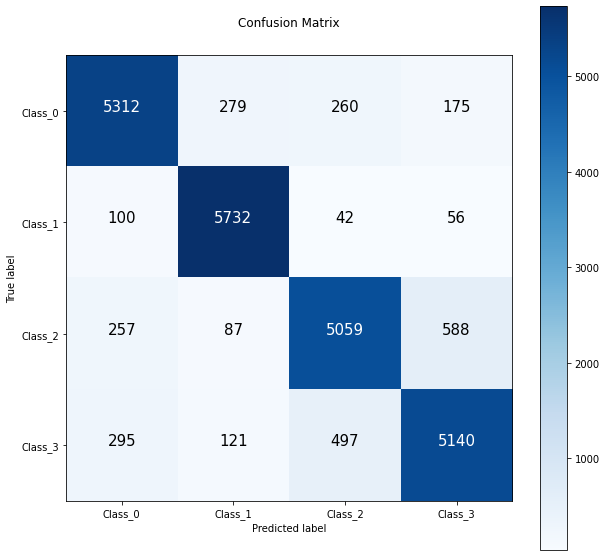

In [ ]:
confusion_matrix_basemodel_0 = make_confusion_matrix(y_true=y_cv,y_pred=baseline_prediction_model_0,classes=["Class_0","Class_1","Class_2","Class_3"])

#Model_1 with TFIDF vectoriser,Logistic regression: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
model_1 = Pipeline(([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",LogisticRegression(solver='lbfgs', max_iter=1000))

]))
model_1.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=2500,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
baseline_score_model_1 = model_1.score(x_cv,y_cv)
print(f"The accuracy of our model with logistic Bayes is {baseline_score_model_1*100}%")

The accuracy of our model with logistic Bayes is 90.1625%


In [ ]:
baseline_prediction_model_2= model_1.predict(x_cv)

In [ ]:
baseline_model_results_1= model_evaluation_matrix(y_true= y_cv,y_pred=baseline_prediction_model_2)

In [ ]:
print(baseline_model_results_1)

# Model_2 with randomforest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2  = Pipeline([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",RandomForestClassifier(n_estimators=200,random_state=0))

])

model_2.fit(x_train,y_train)

In [ ]:
baseline_score_model_2 = model_2.score(x_cv,y_cv)
print(f"The accuracy of our model with Random forest is {baseline_score_model_2*100}%")

In [ ]:
baseline_prediction_model_2 = model_2.predict(x_cv)

In [ ]:
baseline_model_results_2= model_evaluation_matrix(y_true= y_cv,y_pred=baseline_prediction_model_2)

In [ ]:
print(baseline_model_results_2)

# Neural Network and transformer based architecture:

In this sessions, we are going to do the following:

1. Convert the input into tokens.
2. Pass the tokens into embedding layers 
3. Add positioning embedding into the input embeddings 
4. Pass it to the transformer based layers with 3 attaintion head 
5. compile the model
6. Fit the model
7. Evaluate the model

In [ ]:
# We will define Tensorflow calls function which will create tensorflow directory for tensorflow_logs
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
SAVE_DIR = "model_logs"

### Build the Neural transfomer based architecture 

We have our clean data. Now we have to convert it into numericals. There are many strategies can be applied(like count based, TFIDF,word2Vec)and word embedding.
In this problem, we are going to use 
Index based tokenisation and embedding(Learnable) 

In [ ]:


#text_vectorizer = TextVectorization(max_tokens='None', # How many words in the vocabulary and also adds <OOV>, out ofvocabulary
                                    standardize='None', # as the data is already cleaned, we are not using standardization 
                                    ngrams=None,# we are using unigram here and not considering ngrams
                                    output_mode='int', # we are going to have int tokens and tells us how to map tokens to number
                                    output_sequence_length=None,# automatically matches with the longest sentence if none)
                                    pad_to_max_tokens=True)


In [ ]:
# find the 90% percentile of the length of feature matrix
# Based on the finding of 90 percentile, we can select the length of the output Vector 



percentile_99 = np.percentile([len(i.split())for i in x_train],99)

In [ ]:
print(percentile_99)

47.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Setting up the text vectorization variables
max_vocab_length =10000
max_length = 50 # We considering 99 percentile information for the max length

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,output_mode="int",output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text. 

text_vectorizer.adapt(x_train)

In [ ]:
sample_sentence="comet asteroid planet around nearby star space com space com nearby star think harbor comet asteroid appear home planets presumed world small jupiter could tiny pluto new observation suggest dollar"

In [ ]:
# Printing out the values of the vectorizer in a sample text
a=text_vectorizer([sample_sentence])
print(a.shape)
print(a) 

(1, 50)
tf.Tensor(
[[4384 4638 1324  393 4125  328  153  165  153  165 4125  328  519 5938
  4384 4638  561  108    1    1   15  399 6115   61 1801    1    4 6200
   942    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]], shape=(1, 50), dtype=int64)


Embdedding layer: To make our embedding, we are going to use Tensorflow's embedding layers
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about the embedding layers :
1. Input_dim: The size of the vocabulary 
2. Output_dim: The size of the output emdedding vector,for example we take as 128 and hence for each tokens I will get a 128 represenational vectors 
3. Input_length: Length of the sequence to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length,output_dim=128,embeddings_initializer="uniform",input_length=max_length)
embedding

In [ ]:
import random
from random import choices
random_sentence = random.choice(x_train)
print(f"Orginal text :\n {random_sentence}\n\n Embedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orginal text :
 flight gambling way easily bore plane maybe little blackjack help pass time london reuters airline passenger may soon able away air mile flight gamble low cost carrier dollar

 Embedded version:


<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
array([[[ 0.0010304 ,  0.04108102,  0.03890279, ...,  0.03078732,
          0.00104959, -0.00337709],
        [ 0.03023812, -0.04385585,  0.00405668, ..., -0.03843551,
         -0.02590123,  0.01943239],
        [ 0.00866805, -0.03447075,  0.00648971, ...,  0.04726822,
          0.03881549,  0.0476532 ],
        ...,
        [-0.04746889, -0.01335956,  0.02652446, ...,  0.01005045,
         -0.0387256 , -0.01624256],
        [-0.04746889, -0.01335956,  0.02652446, ...,  0.01005045,
         -0.0387256 , -0.01624256],
        [-0.04746889, -0.01335956,  0.02652446, ...,  0.01005045,
         -0.0387256 , -0.01624256]]], dtype=float32)>

We checked our embedding layers and it is outputting a vectorof shape(1,50,128) and it working fine. 
here our input is a single sentence
we have taken max length of each sentence as 50
and  128 is the dimention of each vecor. So our embedding layer is outputting a vector of 128 of each  of the 50 tokens.

In [ ]:
# This is what is the output of the first word from senquence we have created a Vector of length 50.Wecan say each sentence has 50 tokens.
# Then by using that tokens each tokense
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0010304 ,  0.04108102,  0.03890279, -0.00755645, -0.02411021,
        0.00783348, -0.01325382, -0.01727714,  0.04835686, -0.02689449,
        0.02246002,  0.03583809, -0.03451157, -0.03577375, -0.00062769,
       -0.03515584, -0.03414202, -0.04903704,  0.04452194,  0.01645888,
        0.04838565, -0.00174398, -0.04157789,  0.02630005, -0.02360678,
       -0.03561788, -0.02983769,  0.00815445, -0.02282293, -0.00346946,
       -0.01269216,  0.03218127, -0.03634027,  0.03002486,  0.00550717,
       -0.04039006,  0.00096893, -0.03066278,  0.01305132, -0.03382941,
       -0.02671132,  0.01481214, -0.04336193, -0.01001552,  0.00414451,
       -0.0134202 ,  0.01566756, -0.00700479,  0.04250291,  0.02345813,
       -0.03968759,  0.01795026, -0.01486737, -0.04562383, -0.03706261,
       -0.01370343,  0.00097358,  0.04576773, -0.04766062,  0.01933985,
        0.04568866,  0.02580469, -0.03218863,  0.01183046,  0.00334803,
        0.033842

In [ ]:
sample_embed[0][1]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 3.0238118e-02, -4.3855846e-02,  4.0566809e-03,  4.2966340e-02,
        1.8748019e-02,  3.4018826e-02,  2.9222403e-02,  2.4364840e-02,
        3.6878336e-02, -3.0720269e-02,  4.8994172e-02,  4.2026829e-02,
        3.0265562e-03,  8.1849322e-03,  5.5489317e-03, -1.9942595e-02,
       -1.3533734e-02,  4.3804273e-03,  2.6269443e-03,  1.7392937e-02,
        4.7051694e-02, -3.8315199e-02, -3.5448432e-02, -3.6268376e-02,
        1.4116254e-02, -1.1887491e-02, -2.6348352e-02,  2.7910247e-03,
       -2.6181066e-02,  4.9580943e-02, -2.6233828e-02,  2.4458025e-02,
        4.2308494e-04, -3.4945630e-02, -1.3735354e-02,  3.9490927e-02,
       -4.4092119e-02, -1.4548376e-04, -2.4359429e-02, -4.3366779e-02,
        3.4137655e-02, -1.9244755e-02, -3.7139654e-03,  3.2053147e-02,
        3.7059676e-02, -3.4670614e-02,  9.0024956e-03,  3.6920223e-02,
       -8.1758611e-03,  1.9727204e-02,  2.4049569e-02, -1.7105736e-02,
       -3.5636522e-02, -1.351

### Simple MLP based learning :


In [ ]:
from tensorflow.keras import layers 

inputs = layers.Input(shape=(1,),dtype=tf.string) # inputs are 1 -d strings 
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dense(4,activation='softmax')(x)


model_3 = tf.keras.Model(inputs,outputs,name= "model_3_Dense_MLP")

ValueError: ignored

In [ ]:
model_3.summary()

Model: "model_3_Dense_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 50)                0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_11  (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)         

In [ ]:
model_3.compile(optimizer= tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(x = x_train,y=y_train,epochs=5,validation_data=(x_cv,y_cv),callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_3_denseMLP")])

Saving TensorBoard log files to: model_logs/model_3_denseMLP/20210716-112000
Epoch 1/5
3000/3000 [==============================] - 61s 20ms/step - loss: 0.6304 - accuracy: 0.7257 - val_loss: 0.2945 - val_accuracy: 0.9078
Epoch 2/5
3000/3000 [==============================] - 61s 20ms/step - loss: 0.2408 - accuracy: 0.9163 - val_loss: 0.3272 - val_accuracy: 0.8919
Epoch 3/5
3000/3000 [==============================] - 60s 20ms/step - loss: 0.2191 - accuracy: 0.9241 - val_loss: 0.3790 - val_accuracy: 0.8866
Epoch 4/5
3000/3000 [==============================] - 62s 21ms/step - loss: 0.2115 - accuracy: 0.9265 - val_loss: 0.2732 - val_accuracy: 0.9110
Epoch 5/5
3000/3000 [==============================] - 60s 20ms/step - loss: 0.2036 - accuracy: 0.9291 - val_loss: 0.2662 - val_accuracy: 0.9146



**Difference between Cross Entropy and Sparse Cross entrophy**
Both, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention Yi (i,e true labels).

If your Yi's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.m

In [ ]:
model_3_pred_probs  = model_3.predict(x_cv) 
model_3_pred_probs[0]

array([2.7698401e-04, 7.0570910e-10, 9.9972290e-01, 1.3072714e-07],
      dtype=float32)

In [ ]:
model_3_pred_probs= tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred_probs[:20]

<tf.Tensor: shape=(20, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)>

As our Y_Cv is not one hot encoded, we will do then going to comapare that. 

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

#Model_3 Transformer Based Architecture: 
   We will build the Nueral Network by using 2 hidden layers by using functional API of tensorflow.

 For  Transformer based models. we will load the cleaned data and then perform the tokenisation and postional encoding then we will pass it to the transformer model. 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/NLP/Document_classification_project_BBC_Data/AG_Dataset/cleaned_dataset_training_csv")

In [ ]:
dataset.head()

,Class_variable,Title_desc_combined
0,2,wall st bear claw back black reuters reuters s...
1,2,carlyle look toward commercial aerospace reute...
2,2,oil economy cloud stock outlook reuters reuter...
3,2,iraq halt oil export main southern pipeline re...
4,2,oil price soar time record pose new menace us ...


In [ ]:
#Helper function to covert y labels to text

# def replace_classvariable_text(a):

#    if a==1:

#      a="Class_0"
#      return a
#    elif  a==2:
#      a="Class_1"
#      return a
#    elif a==3:
#      a="Class_2"
#      return a
#    elif a==4:
#      a="Class_3"
#      return a


In [ ]:
#dataset['Class_variable'] = dataset["Class_variable"].apply(replace_classvariable_text)

In [ ]:
from sklearn.utils import shuffle

dataset=shuffle(dataset,random_state=42)

In [ ]:
dataset.head()

,Class_variable,Title_desc_combined
71787,2,bbc set major shake claim newspaperlondon brit...
67218,2,marsh averts cash crunchembattled insurance br...
54066,1,jeter yankee look take control ap ap derek jet...
7168,3,fly sun safetywhen genesis capsule come back e...
29618,2,stock see flat nortel oil weigh new york reute...


In [ ]:
x = dataset.iloc[:,1]

In [ ]:
y =dataset.iloc[:,0]

In [ ]:
# We have our X and Y. Initialzing parameters for text preprocesing 

vocab_size = 10000

max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
training_size=int(len(x)*training_portion)
x_train = x[:training_size]
y_train = y[:training_size]
x_val = x[training_size:]
y_val = y[training_size:]

In [ ]:
print(training_size)
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

96000
96000
96000
24000
24000


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### Converting the training sentences into numberical sequence

In [ ]:
#  Converting the training sequences to numerical sequence
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
print(train_sequences[1221])

[288, 245, 1046, 2872, 3825, 1, 1591, 721, 151, 1560, 42, 69, 111, 288, 1046, 663, 468, 1044, 1, 343, 1535, 2]


In [ ]:
### Converting the validation sequence to numerical sequence
validation_sequences = tokenizer.texts_to_sequences(x_val)

print(validation_sequences[10])

[1407, 216, 1, 1407, 216, 587, 203, 223, 60, 497, 16, 1, 1371, 240, 4048, 837, 668, 2]


### Padding the Input sequence :

In [ ]:
### Panding the Input sequence 

training_x = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length)
validation_x = tf.keras.preprocessing.sequence.pad_sequences(validation_sequences, maxlen=max_length)

In [ ]:
# Checking the shapes
print(training_x[0].shape)
print(training_x.shape)

(50,)
(96000, 50)


In [ ]:
#Checking the shapes of the validation data
print(validation_x[0].shape)
print(validation_x.shape)

(50,)
(24000, 50)


In [ ]:
training_label_seq = np.array(y_train)
validation_label_seq = np.array(y_val)

 

In [ ]:
training_label_seq[10]

3

### Trasformer model implementation:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 256  # Embedding size for each token
num_heads = 4 # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(24, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(4, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
token_and_position_embedding (None, 50, 256)           2572800   
_________________________________________________________________
transformer_block_3 (Transfo (None, 50, 256)           1086016   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                6168      
_________________________________________________________________
dropout_15 (Dropout)         (None, 24)                0   

In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
   training_x,training_label_seq,batch_size=32,epochs=10, validation_data=(validation_x,validation_label_seq)
)

Epoch 1/10
3000/3000 [==============================] - 1064s 354ms/step - loss: 1.3869 - accuracy: 0.2483 - val_loss: 1.3866 - val_accuracy: 0.2482
Epoch 2/10
3000/3000 [==============================] - 1067s 356ms/step - loss: 0.9285 - accuracy: 0.5439 - val_loss: 0.3415 - val_accuracy: 0.8869
Epoch 3/10
3000/3000 [==============================] - 1066s 355ms/step - loss: 0.2986 - accuracy: 0.9034 - val_loss: 0.2733 - val_accuracy: 0.9132
Epoch 4/10
3000/3000 [==============================] - 1057s 352ms/step - loss: 0.2345 - accuracy: 0.9252 - val_loss: 0.3054 - val_accuracy: 0.9068
Epoch 5/10
3000/3000 [==============================] - 1050s 350ms/step - loss: 0.2013 - accuracy: 0.9331 - val_loss: 0.2869 - val_accuracy: 0.9130
Epoch 6/10
3000/3000 [==============================] - 1049s 350ms/step - loss: 0.1763 - accuracy: 0.9405 - val_loss: 0.3029 - val_accuracy: 0.9119
Epoch 7/10
3000/3000 [==============================] - 1059s 353ms/step - loss: 0.1524 - accuracy: 0.9482